![Alt text](image.png)

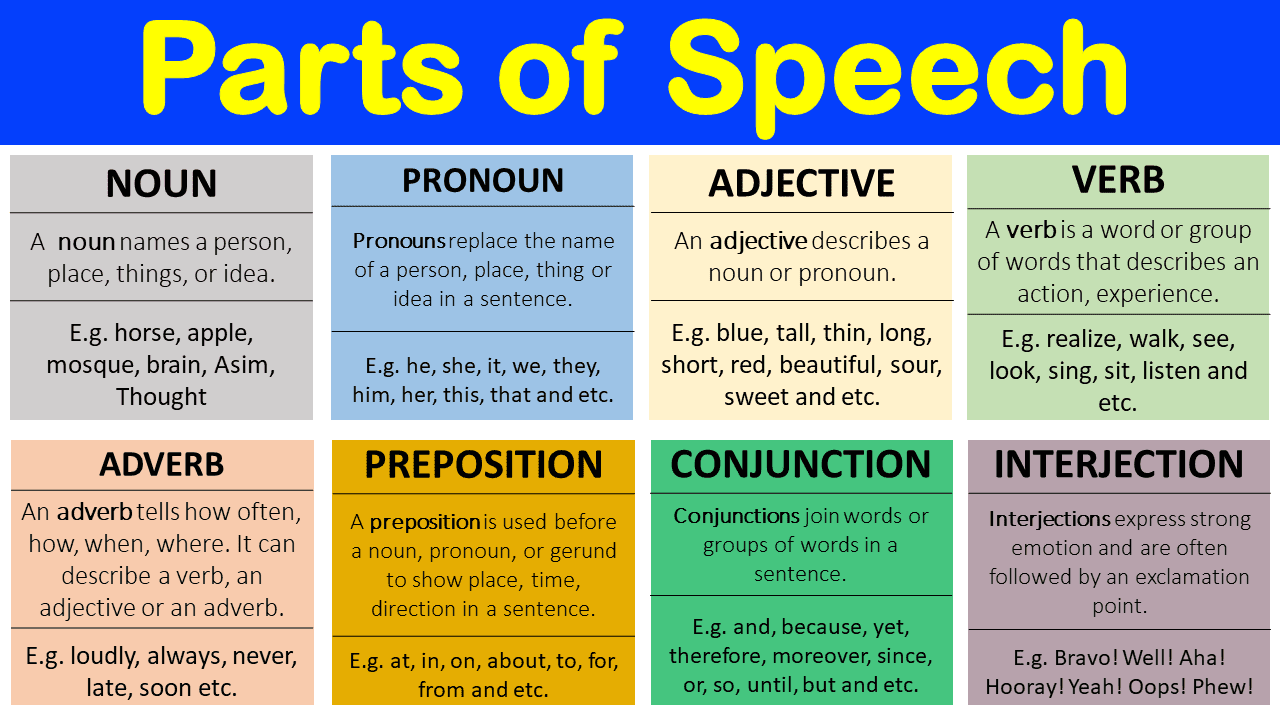

In [1]:
import spacy

nlp = spacy.load('en_core_web_sm')

c:\Users\FURKANSALMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
doc = nlp("Elon flew to Mars on a rocket ship. He carried a kebab with him.")

for token in nlp(doc):
    print(token.text," ==> ",token.pos_, " | ",spacy.explain(token.pos_))

Elon  ==>  PROPN  |  proper noun
flew  ==>  VERB  |  verb
to  ==>  ADP  |  adposition
Mars  ==>  PROPN  |  proper noun
on  ==>  ADP  |  adposition
a  ==>  DET  |  determiner
rocket  ==>  NOUN  |  noun
ship  ==>  NOUN  |  noun
.  ==>  PUNCT  |  punctuation
He  ==>  PRON  |  pronoun
carried  ==>  VERB  |  verb
a  ==>  DET  |  determiner
kebab  ==>  NOUN  |  noun
with  ==>  ADP  |  adposition
him  ==>  PRON  |  pronoun
.  ==>  PUNCT  |  punctuation


In [8]:
doc = nlp("Wow! Dr. Strange made 256 million $ on the very first day of his movie release.")

for token in nlp(doc):
    print(token.text," ==> ",token.pos_, " | ",spacy.explain(token.pos_), " | ",token.tag_, " | ",spacy.explain(token.tag_))

Wow  ==>  INTJ  |  interjection  |  UH  |  interjection
!  ==>  PUNCT  |  punctuation  |  .  |  punctuation mark, sentence closer
Dr.  ==>  PROPN  |  proper noun  |  NNP  |  noun, proper singular
Strange  ==>  PROPN  |  proper noun  |  NNP  |  noun, proper singular
made  ==>  VERB  |  verb  |  VBD  |  verb, past tense
256  ==>  NUM  |  numeral  |  CD  |  cardinal number
million  ==>  NUM  |  numeral  |  CD  |  cardinal number
$  ==>  SYM  |  symbol  |  $  |  symbol, currency
on  ==>  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition
the  ==>  DET  |  determiner  |  DT  |  determiner
very  ==>  ADV  |  adverb  |  RB  |  adverb
first  ==>  ADJ  |  adjective  |  JJ  |  adjective (English), other noun-modifier (Chinese)
day  ==>  NOUN  |  noun  |  NN  |  noun, singular or mass
of  ==>  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition
his  ==>  PRON  |  pronoun  |  PRP$  |  pronoun, possessive
movie  ==>  NOUN  |  noun  |  NN  |  noun, singular o

Using tag feature we can get further information about the word. For example, if the word is present tense, past tense, gerund, etc.

In [13]:
earnings_text="""Microsoft Corp. today announced the following results for the quarter ended December 31, 2021, as compared to the corresponding period of last fiscal year:
·         Revenue was $51.7 billion and increased 20%
·         Operating income was $22.2 billion and increased 24%
·         Net income was $18.8 billion and increased 21%
·         Diluted earnings per share was $2.48 and increased 22%
“Digital technology etc. is the most malleable resource at the world’s disposal to overcome constraints and reimagine everyday work and life,” said Satya Nadella, chairman and chief executive officer of Microsoft. “As tech as a percentage of global GDP continues to increase, we are innovating and investing across diverse and growing markets, with a common underlying technology stack and an operating model that reinforces a common strategy, culture, and sense of purpose.”
“Solid commercial execution, represented by strong bookings growth driven by long-term Azure commitments, increased Microsoft Cloud revenue to $22.1 billion, up 32% year over year” said Amy Hood, executive vice president and chief financial officer of Microsoft."""

doc = nlp(earnings_text)

For the example text above you might be interested in getting rid of the punctuation and the stop words.

In [18]:
filtered_tokens = []

for token in doc:
    if token.pos_ not in ["SPACE","PUNCT","x"]:
        print(token.text," ==> ",token.pos_, " | ",spacy.explain(token.pos_))
        filtered_tokens.append(token)

Microsoft  ==>  PROPN  |  proper noun
Corp.  ==>  PROPN  |  proper noun
today  ==>  NOUN  |  noun
announced  ==>  VERB  |  verb
the  ==>  DET  |  determiner
following  ==>  VERB  |  verb
results  ==>  NOUN  |  noun
for  ==>  ADP  |  adposition
the  ==>  DET  |  determiner
quarter  ==>  NOUN  |  noun
ended  ==>  VERB  |  verb
December  ==>  PROPN  |  proper noun
31  ==>  NUM  |  numeral
2021  ==>  NUM  |  numeral
as  ==>  SCONJ  |  subordinating conjunction
compared  ==>  VERB  |  verb
to  ==>  ADP  |  adposition
the  ==>  DET  |  determiner
corresponding  ==>  ADJ  |  adjective
period  ==>  NOUN  |  noun
of  ==>  ADP  |  adposition
last  ==>  ADJ  |  adjective
fiscal  ==>  ADJ  |  adjective
year  ==>  NOUN  |  noun
Revenue  ==>  NOUN  |  noun
was  ==>  AUX  |  auxiliary
$  ==>  SYM  |  symbol
51.7  ==>  NUM  |  numeral
billion  ==>  NUM  |  numeral
and  ==>  CCONJ  |  coordinating conjunction
increased  ==>  VERB  |  verb
20  ==>  NUM  |  numeral
%  ==>  NOUN  |  noun
Operating  ==>  V

If you are interested in how many times a particular POS tag appears in the text you can use count_by.

In [26]:
counts = doc.count_by(spacy.attrs.POS)
for k,v in counts.items():
    print(doc.vocab[k].text," ==> ",v, " times")

PROPN  ==>  13  times
NOUN  ==>  46  times
VERB  ==>  24  times
DET  ==>  9  times
ADP  ==>  16  times
NUM  ==>  16  times
PUNCT  ==>  27  times
SCONJ  ==>  1  times
ADJ  ==>  20  times
SPACE  ==>  10  times
AUX  ==>  6  times
SYM  ==>  5  times
CCONJ  ==>  12  times
X  ==>  2  times
ADV  ==>  3  times
PART  ==>  3  times
PRON  ==>  2  times


# Exercises:

In [27]:
with open("news_story.txt","r") as f:
    news_story = f.read()

Extract all NOUN tokens from this story. You will have to read the file in python first to collect all the text and then extract NOUNs in a python list

In [32]:
nouns = []

doc = nlp(news_story)

for token in doc:
    if token.pos_ == "NOUN":
        nouns.append(token.text)
nouns[:10]

['Inflation',
 'climb',
 'consumers',
 'brink',
 'expansion',
 'consumer',
 'price',
 'index',
 'measure',
 'prices']

Extract all numbers (NUM POS type) in a python list

In [33]:
nums = []

for token in doc:
    if token.pos_ == "NUM":
        nums.append(token.text)
nums[:10]

['8.3', '8.1', '1982', '6.2', '6', 'â€', '0.3', '0.2', '0.6', '0.4']

Print a count of all POS tags in this story

In [34]:
counts = doc.count_by(spacy.attrs.POS)

for k,v in sorted(counts.items(),key=lambda x:x[1],reverse=True):
    print(doc.vocab[k].text," ==> ",v, " times")

NOUN  ==>  98  times
ADP  ==>  39  times
DET  ==>  34  times
PUNCT  ==>  32  times
VERB  ==>  27  times
ADJ  ==>  23  times
NUM  ==>  20  times
PROPN  ==>  17  times
ADV  ==>  15  times
AUX  ==>  13  times
CCONJ  ==>  10  times
SCONJ  ==>  8  times
SPACE  ==>  7  times
PRON  ==>  4  times
PART  ==>  4  times
X  ==>  1  times
